# PCA

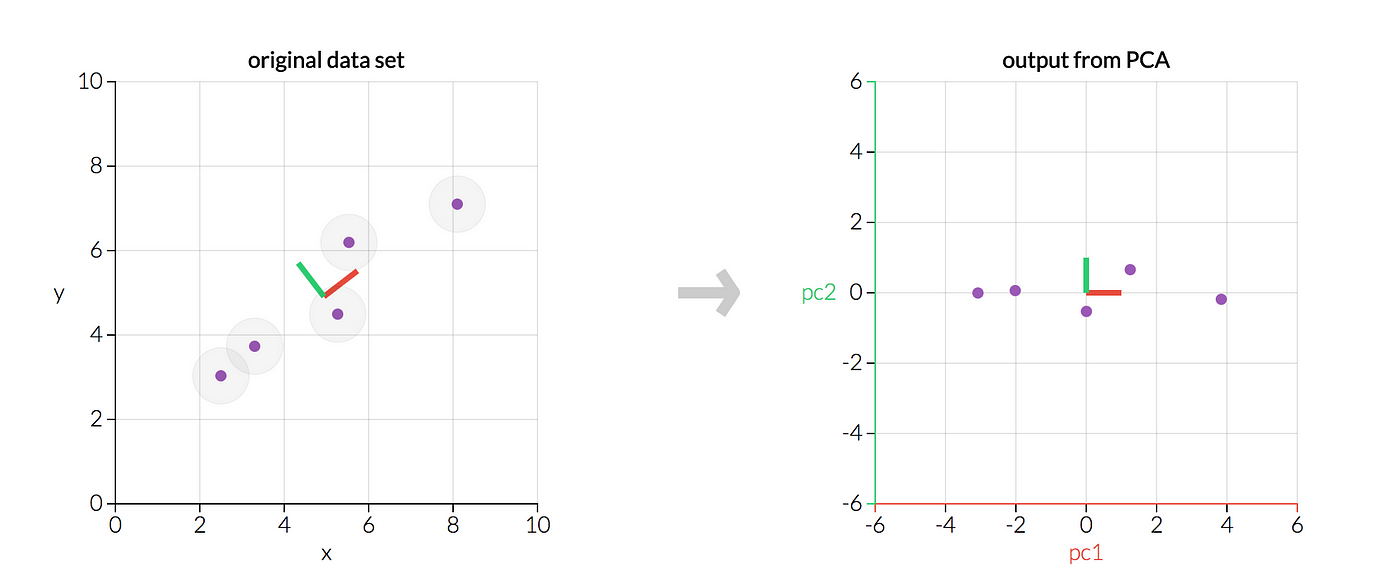

**Principal Component Analysis (PCA)** is a technique for **feature extraction** - by **obtaining the most 'important' variables** while dropping the least. It is usually used to **reduce dimensionality**. Here are the **formal steps** of achieving this goal:
1.   First, obtain matrix X only contains the columns of **independent variables.**
2.   Then, **standardize** the columns of matrix X to have **a mean of 0 and standard deviation of 1** in each column.
3.   After standardizing, calculate the $X^TX$ which is the **covariance matrix** of X.
4.   Then, find the **eigenvector and corresponding eigenvalue** of this covariance matrix using **eigendecomposition**.
5.   Rearrange the **eigenvector by sorting the corresponding eigenvalue from the largest to the smallest**.
6.   After sorting, the **top eigenvectors will be the line that spans the first dimension that captures the most 'information'** in the variables (which means that **it keeps the largest variance** in the original variables and this is **demonstrated by its eigenvalues**).
7.   Keep the **most top n eigenvectors** depending on **how many dimensions you want to keep** (it can be 2 which is easier to visualize), then simply maps all the data points onto each of the new dimensions and the resulted points from all dimensions will be the final result.



***Note***: it is common to keep a **certain percent of variance** in the variables and to calculate this, simply find up to $λ_i$ such that ($λ_1 + .... + λ_i$)/($λ_1 + .... + λ_n$) is **greater than or equal to** the specified variance; thus, it shows that you just need to keep i dimensions to have this percent of variance.

**The above summarized steps are reasonable but not easy to understand. Here is a more intuitive and clear explaination.**

Say we have **n variables with dimension n** and the **goal is to map this dimension to a space with a dimension m that is less than n**.
1.   First, we want to map it onto a **one dimensional space** which means we need to find a vector $u_1$ in the original space and project every point to this vector.
2.   In order to captures the **most 'information'** in the original space, we want to **maximize the variance of this projection** onto this vector.
3.   By projection definition, a projection of $x_i$ onto $u_1$ will be Proj($x_i$) = $u^T_1x_iu$ where $u$ is a **unit vector**. Similarly, for a mean value will be $u^T_1\bar{x}u$
4.   Since we want to **maximize the variance,** by definition of variance, it is the same to maximize the equation of $\frac{1}{N}Σ^N_{n=1}(u^T_1x_n - u^T_1\bar{x})^2$ = $\frac{1}{N}Σ^N_{n=1}(u^T_1(x_n - \bar{x}))^2$ = $\frac{1}{N}Σ^N_{n=1}(u^T_1(x_n - \bar{x})(x_n-\bar{x})^Tu_1)$ = $u^T_1(\frac{1}{N}Σ^N_{n=1}(x_n - \bar{x})(x_n-\bar{x})^T)u_1$
5.   Note that the middle of equation is exactly the **covariance matrix** and let's denote it as $C$.
6.   Thus, now we have to **maximize** $u^T_1Cu_1$ with the **constraint** that $u^T_1u_1 = 1$ and this is because $u_1$ is a **unit vector** with $||u|| = 1$. This looks familiar because it is a **Lagrange Multiplier** problem as **we are finding the maxima of a function subject to equation constraints.**
7.   Then, by applying this method, we have equation of $u^T_1Cu_1 + λ(1 - u^T_1u_1)$ and we will need to do partial derivative respect to $u_1$, and we will get $2Cu_1 - λ2u_1 = 0$. This is because of the **derivative of matrix computation** ($\frac{d}{dx}x^TAx = 2Ax$).
8.   To solve above equation, we will have $Cu_1=λu_1$ and this is exactly the **eigenvector equation**. By multiplying $u^T_1$ on each side, we will have $u^T_1Cu_1 = λu^T_1u_1$ and since $u^T_1u_1 = 1$. Then, $u_1^TCu_1 = λ$.
9.   Note that $u_1^TCu_1$ **is the original equation we want to maximize**, hence, it is the same to say find the **maximum eigenvalue** $λ$.
10.   Finally, for the first one dimensional space to put original space onto this space, we need to choose the **normalized eigenvector with the most largest corresponding eigenvalue.**
11.   **Similarly, to map original space to a m dimensional space, we just need to find the top m eigenvectors with corresponding top m eigenvalues**.






***Note:*** **PCA is a linear method** which means that it does a **good job** on datasets that are **linearly separable**; however, when it applies to **non-linear datasets**, we may not get a **optimal dimensionality reduction.**

Similiar to SVM, there is **trick** when data is not **linearly separable** which is using **the kernel** (More detailed explaination about kernel is SVM). By apply **kernel function** to map dataset onto a **higher dimension which is linearly separable**, **PCA** is then applied to this transformed data.

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components=2, kernel='rbf')
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

1.0

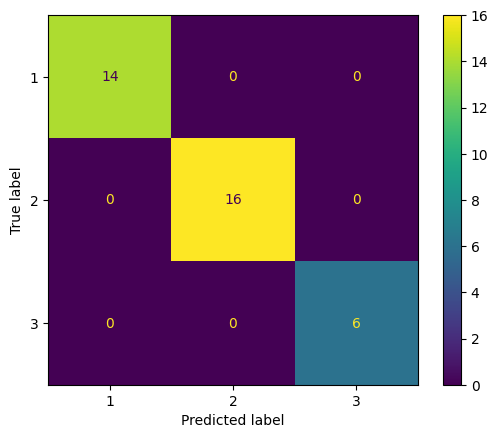

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3]).plot()
accuracy_score(y_test, y_pred)

## Visualising the Training set results

<ipython-input-8-e65d08c92b40>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


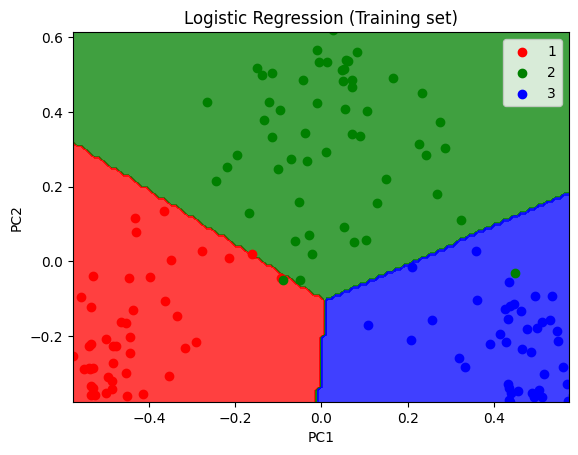

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min(), stop=X_set[:, 0].max(), step=0.01),
                     np.arange(start=X_set[:, 1].min(), stop=X_set[:, 1].max(), step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-9-130ab51a99ca>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label = j)


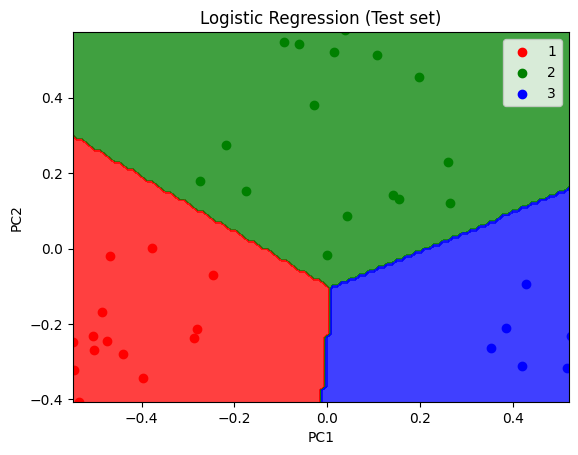

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min(), stop=X_set[:, 0].max(), step=0.01),
                     np.arange(start=X_set[:, 1].min(), stop=X_set[:, 1].max(), step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()